In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import requests
import pandas as pd
import io

In [5]:

url="https://raw.githubusercontent.com/Mavericky007/Streamlit/main/Bolt/data1.csv"

s=requests.get(url).content

df=pd.read_csv(io.StringIO(s.decode('utf-8')))

data = df

# Display the first few rows of the dataset

data.head()

,Time,Category level 0,Category level 1,Category level 2,Unique SKUs Listed,Unique SKUs Sold,# of sold SKU items,Price before Discount (includ. VAT) (EUR),Discount Value (EUR),Item COGS (net VAT) (EUR),"Waste, # of items"
0,2023-09-17,Fresh Food,🧀 Cheese,Hard Cheese,26,17,37,135.812592,10.491467,88.81738,0
1,2023-08-02,Fresh Food,🍞 Bakery,Gluten Free,1,0,0,0.000000,0.000000,0.00000,0
2,2023-08-26,Fresh Food,🥛 Dairy & Eggs,Sour Cream & Cream,14,10,26,53.454514,3.213313,31.87778,0
3,2023-09-24,Fresh Food,🥪 Fresh & Ready,Desserts & Sweets,25,13,47,61.698558,3.516517,41.22566,0
4,2023-09-15,Fresh Food,🍗 Meat & Fish,Meat & Fish Alternatives,17,3,8,13.061563,1.358066,8.68154,0


In [6]:
data.dtypes

Time                                          object
Category level 0                              object
Category level 1                              object
Category level 2                              object
Unique SKUs Listed                             int64
Unique SKUs Sold                               int64
# of sold SKU items                            int64
Price before Discount (includ. VAT) (EUR)    float64
Discount Value (EUR)                         float64
Item COGS (net VAT) (EUR)                    float64
Waste, # of items                              int64
dtype: object

In [7]:
data['Category level 0'].unique()

array(['Fresh Food', 'Grocery Food', 'Grocery Non-Food', 'Not defined',
       'Other'], dtype=object)

In [8]:
# category_df = filtered_df.groupby(by = ["Category"], as_index = False)["Sales"].sum()
cat1_df = data.groupby(by = ["Category level 0"], as_index = False)["# of sold SKU items"].sum()

cat1_df.head()

,Category level 0,# of sold SKU items
0,Fresh Food,195185
1,Grocery Food,336804
2,Grocery Non-Food,89360
3,Not defined,960
4,Other,60464


In [9]:
cat1_df = data.groupby(by = ["Category level 0"], as_index = False)["Waste, # of items"].sum()

cat1_df.head()

,Category level 0,"Waste, # of items"
0,Fresh Food,17433
1,Grocery Food,3321
2,Grocery Non-Food,317
3,Not defined,42
4,Other,0


In [18]:
data["Time"] = pd.to_datetime(data["Time"]) 

## Cheking for Null Values in the Data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17401 entries, 0 to 17400
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time                                       17401 non-null  datetime64[ns]
 1   Category level 0                           17401 non-null  object        
 2   Category level 1                           17401 non-null  object        
 3   Category level 2                           17401 non-null  object        
 4   Unique SKUs Listed                         17401 non-null  int64         
 5   Unique SKUs Sold                           17401 non-null  int64         
 6   # of sold SKU items                        17401 non-null  int64         
 7   Price before Discount (includ. VAT) (EUR)  17401 non-null  float64       
 8   Discount Value (EUR)                       17401 non-null  float64       
 9   Item COGS (net VA

## Checking the Numberic feilds for max/min/count etc..

In [20]:
data.describe()

,Unique SKUs Listed,Unique SKUs Sold,# of sold SKU items,Price before Discount (includ. VAT) (EUR),Discount Value (EUR),Item COGS (net VAT) (EUR),"Waste, # of items"
count,17401.000000,17401.000000,17401.000000,17401.000000,17401.000000,17401.000000,17401.000000
mean,17.336647,7.786334,39.237573,84.071694,4.373557,55.050541,1.213321
std,17.974634,9.810760,91.889347,192.813177,10.959460,145.314288,6.160330
min,0.000000,0.000000,0.000000,0.000000,-44.296566,0.000000,0.000000
25%,5.000000,2.000000,3.000000,9.962655,0.000000,6.067270,0.000000
50%,11.000000,4.000000,11.000000,32.113726,1.528352,19.697160,0.000000
75%,24.000000,10.000000,34.000000,82.132368,4.555093,51.189880,0.000000
max,98.000000,67.000000,934.000000,2809.016331,392.695820,2363.481810,193.000000


## Observation Below:

The dataset is well-structured and complete, with no missing values across its 17,401 entries. Here's a summary of the key numeric columns:

Unique SKUs Listed: Ranges from 0 to 98 with an average of about 17.3.

Unique SKUs Sold: Ranges from 0 to 67 with an average of about 7.8.

No.of sold SKU items: Varies widely from 0 to 934, indicating significant variability in sales volumes across different SKUs.

Price before Discount (including VAT) (EUR): Has a wide range, with a maximum of about 2809 EUR and a mean of around 84 EUR, suggesting some high-ticket items or categories.

Discount Value (EUR): Varies from -44.30 to 392.70 EUR. The negative value could be an anomaly or might indicate refunds or similar transactions.

Item COGS (net VAT) (EUR): Also shows a broad range, similar to the sales values, which is expected.

Waste, # of items: Most values are zero, but it goes up to 193, indicating potential issues in certain areas or products.

## Next, I'll analyze the data to extract insights and provide recommendations, focusing on:

1) Sales performance by category and over time.

2) Impact of discounts on sales.

3) Inventory management, particularly around waste and the balance between listed and sold SKUs

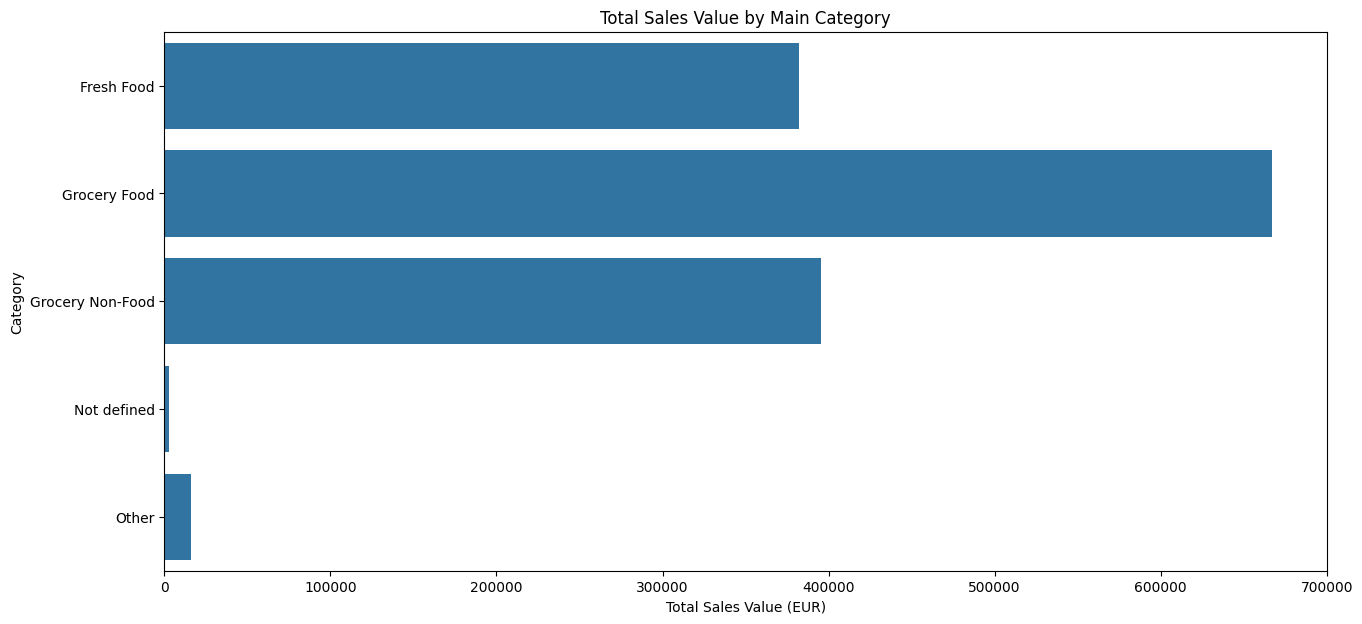

In [21]:
# Analysis 1: Sales Performance by Category and Over Time

# Grouping data by category levels and time for sales analysis
sales_by_category = data.groupby(['Category level 0', 'Category level 1', 'Category level 2']).agg(
    Total_Sales_Value=('Price before Discount (includ. VAT) (EUR)', 'sum'),
    Total_Sold_Items=('# of sold SKU items', 'sum')
).reset_index()


# Visualizing Sales Performance by Category
plt.figure(figsize=(15, 7))
sns.barplot(x='Total_Sales_Value', y='Category level 0', data=sales_by_category.groupby('Category level 0').Total_Sales_Value.sum().reset_index())
plt.title('Total Sales Value by Main Category')
plt.xlabel('Total Sales Value (EUR)')
plt.ylabel('Category')
plt.show()


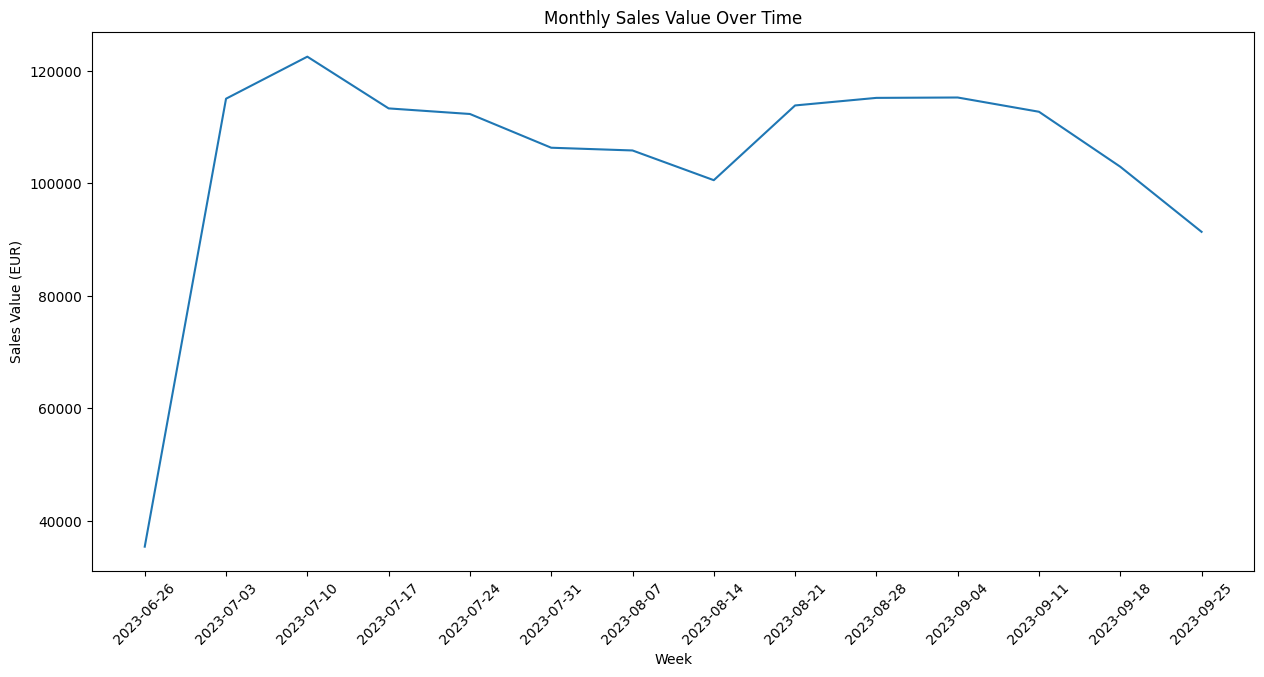

In [22]:
# Function to get the first date of the week
def get_first_day_of_week(date):
    return date - timedelta(days=date.weekday())

# Time-based analysis
data['Week'] = data['Time'].apply(get_first_day_of_week)
sales_over_time = data.groupby('Week').agg(
    Monthly_Sales_Value=('Price before Discount (includ. VAT) (EUR)', 'sum'),
    Monthly_Sold_Items=('# of sold SKU items', 'sum')
).reset_index()


# Visualizing Sales Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=sales_over_time, x=sales_over_time['Week'].astype(str), y='Monthly_Sales_Value')
plt.title('Monthly Sales Value Over Time')
plt.xlabel('Week')
plt.ylabel('Sales Value (EUR)')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Function to get the first date of the week
def get_first_day_of_week(date):
    return date - timedelta(days=date.weekday())

# Time-based analysis
data['Week'] = data['Time'].apply(get_first_day_of_week)
sales_over_time = data.groupby('Week').agg(
    Monthly_Sales_Value=('Price before Discount (includ. VAT) (EUR)', 'sum'),
    Monthly_Sold_Items=('# of sold SKU items', 'sum')
).reset_index()

,Category level 0,Discount Value (EUR),Price before Discount (includ. VAT) (EUR),Discount to Sales Ratio
4,Other,7948.404123,15759.171646,0.504367
3,Not defined,208.992512,2610.663569,0.080053
0,Fresh Food,27112.878488,382221.063786,0.070935
1,Grocery Food,36391.438245,666806.778737,0.054576
2,Grocery Non-Food,4442.558879,395533.868136,0.011232


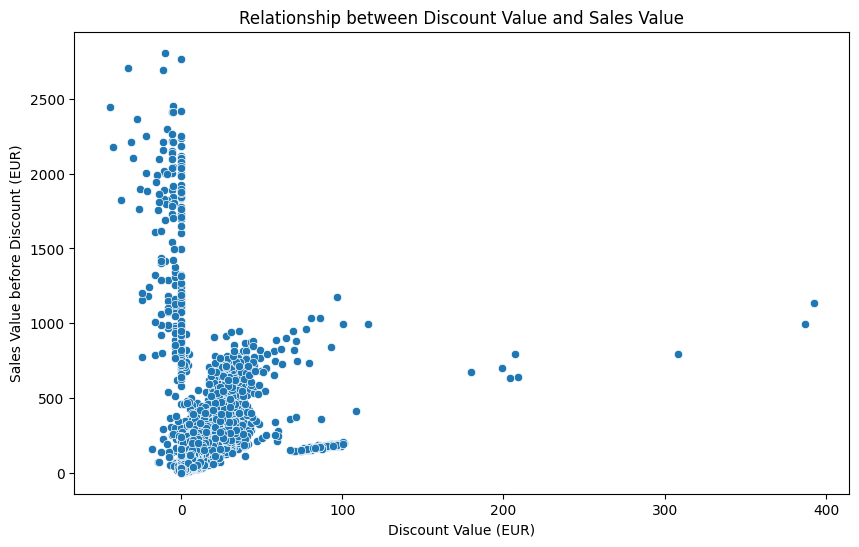

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the correlation between Discount Value and Sales Value
correlation_data = data[['Discount Value (EUR)', 'Price before Discount (includ. VAT) (EUR)']]
correlation = correlation_data.corr()

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount Value (EUR)', y='Price before Discount (includ. VAT) (EUR)', data=data)
plt.title('Relationship between Discount Value and Sales Value')
plt.xlabel('Discount Value (EUR)')
plt.ylabel('Sales Value before Discount (EUR)')

# Category-wise impact of discounts
category_wise_discounts = data.groupby('Category level 0').agg({'Discount Value (EUR)': 'sum', 'Price before Discount (includ. VAT) (EUR)': 'sum'}).reset_index()
category_wise_discounts['Discount to Sales Ratio'] = category_wise_discounts['Discount Value (EUR)'] / category_wise_discounts['Price before Discount (includ. VAT) (EUR)']

# Sorting categories by Discount to Sales Ratio
sorted_categories_by_discount_impact = category_wise_discounts.sort_values(by='Discount to Sales Ratio', ascending=False)

sorted_categories_by_discount_impact.head()  # Displaying the correlation matrix and top 5 categories by discount impact

